# K-Nearest Neighbour Algorithm
For HandWritten Digit Recognition

In [1]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from MNIST_Dataset_Loader.mnist_loader import MNIST
from matplotlib import style
style.use('ggplot')

In [2]:
#print('Loading The MNIST Dataset For Analysis Using KNN/n')
data = MNIST('./MNIST_Dataset_Loader/data')

In [3]:
!cd MNIST_Dataset_Loader/
!ls

K-NN_Applied.ipynb  MNIST_Dataset_Loader  MNIST_KNN_model.pickle  Summary.log


In [4]:
#print('Loading Training Data...')
img_train, labels = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels)

In [5]:
print train_img.shape
print train_labels.shape

(60000, 784)
(60000,)


In [6]:
#print('Loading Testing Data...')
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)

In [7]:
#print(test_img.shape)
#print(test_labels.shape)

In [8]:
# Now as we have laoded the data we are now create are training set and validation set 
X = train_img
Y = train_labels
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)

In [16]:
model = KNeighborsClassifier(n_neighbors=10, algorithm='auto', n_jobs=-1)
model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
           weights='uniform')

In [10]:
# By doing this we are saving the model in binary format using pickle 
with open('MNIST_KNN_model.pickle','wb') as file:
    pickle.dump(model, file)

KeyboardInterrupt: 

In [10]:
file = open('MNIST_KNN_model.pickle', 'rb')
saved_model = pickle.load(file)

In [18]:
# We are going to now check the confidence of the model
confidence = model.score(X_train, Y_train)
print(confidence)

0.974722222222


In [17]:
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_pred, Y_test)
conf_matrix = confusion_matrix(Y_pred, Y_test)
print confidence
print accuracy
print conf_matrix

0.982018518519
0.963833333333
[[582   0   3   1   1   3   5   0   0   1]
 [  1 676   7   3   5   0   3  14   8   3]
 [  0   0 562   2   0   1   0   2   1   1]
 [  0   0   3 572   0   8   0   0  10   6]
 [  0   1   1   0 582   0   3   0   5   9]
 [  1   0   0  10   0 564   0   0  14   1]
 [  1   0   2   1   4   7 565   0   3   0]
 [  0   2  10   2   0   1   0 576   1   9]
 [  0   0   2   6   0   2   0   0 524   1]
 [  0   1   1   2   8   2   0   7   5 580]]


In [21]:
Y_pred_test = model.predict(test_img)
accuracy = accuracy_score(Y_pred_test, test_labels)
conf_matrix = confusion_matrix(Y_pred_test, test_labels)
print confidence
print accuracy
print conf_matrix

0.974722222222
0.9654
[[ 972    0   13    0    2    3    7    0    6    6]
 [   1 1131   12    3   13    1    4   26    4    6]
 [   1    2  979    4    0    0    0    4    5    3]
 [   0    0    3  975    0   14    0    0   13    7]
 [   0    0    1    1  940    1    3    2    6   10]
 [   2    0    0   11    0  859    2    0   11    3]
 [   3    2    3    1    5    7  942    0    5    1]
 [   1    0   18    8    2    2    0  987    8   10]
 [   0    0    3    5    1    1    0    0  908    2]
 [   0    0    0    2   19    4    0    9    8  961]]


In [50]:
#Y_pred1 = saved_model.predict(X_test)
#print(Y_pred1)

[6]


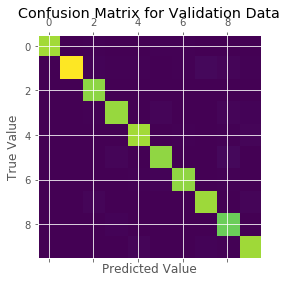

In [19]:
# Now we will plot Confusion Matrix
plt.matshow(conf_matrix)
plt.title('Confusion Matrix for Validation Data')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

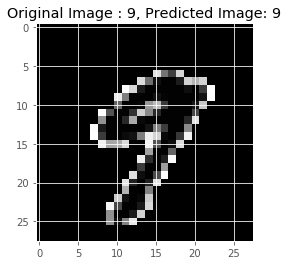

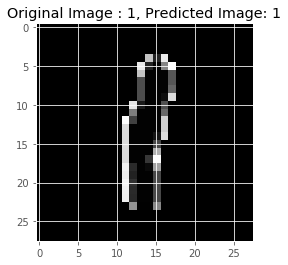

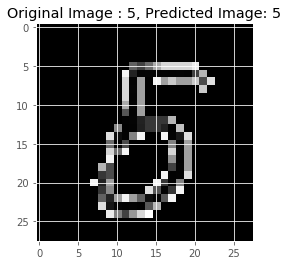

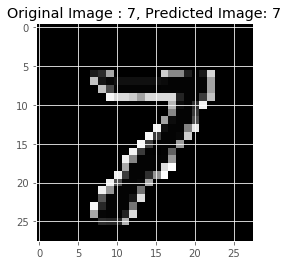

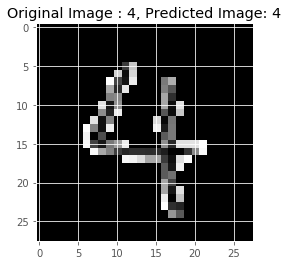

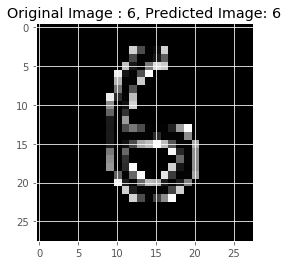

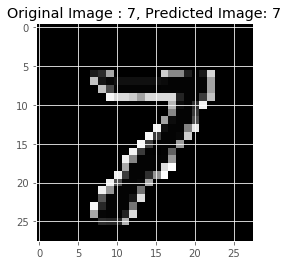

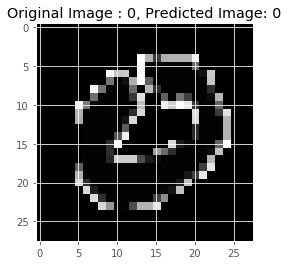

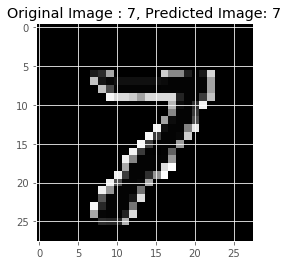

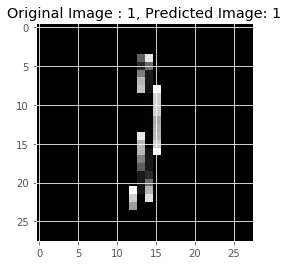

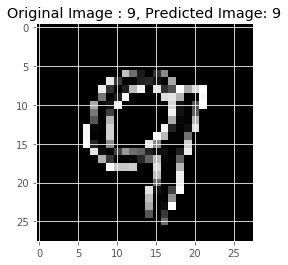

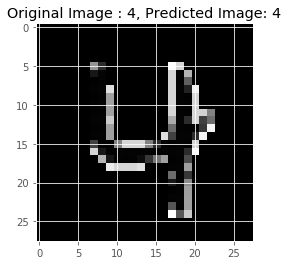

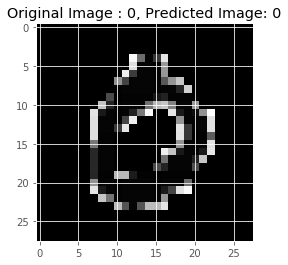

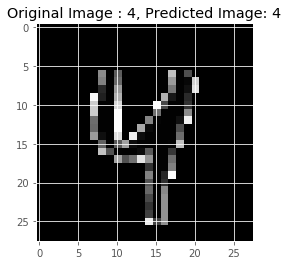

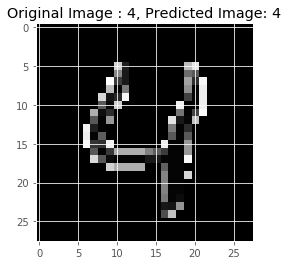

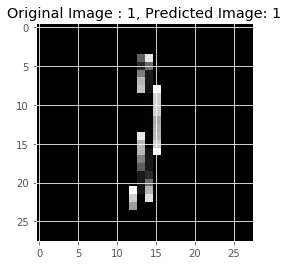

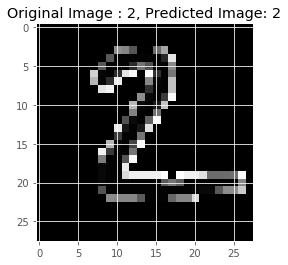

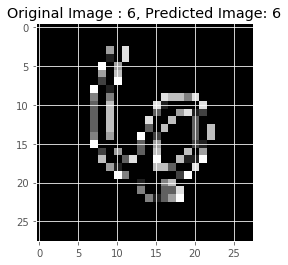

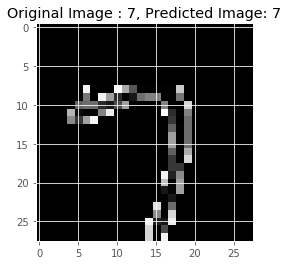

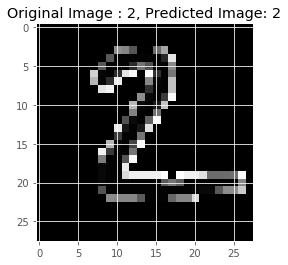

In [23]:
# Now we will show the the Test Images with Predicted Label and True Label
# np.random.randint(lowest_no, highest_no, size)
a = np.random.randint(1,50,size=20)
for i in a:
    Pred_image_label =((np.reshape(test_img[i],(28,28)))*255).astype(np.uint8)
    plt.title('Original Image : {0}, Predicted Image: {1}'.format(test_labels[i], Y_pred_test[i]))
    plt.imshow(Pred_image_label, interpolation='nearest',cmap='gray')
    plt.show()

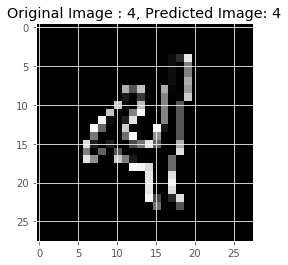

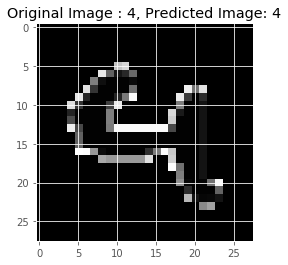

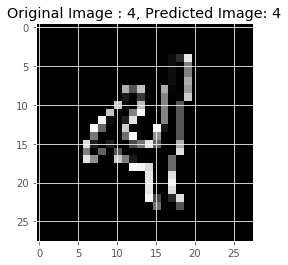

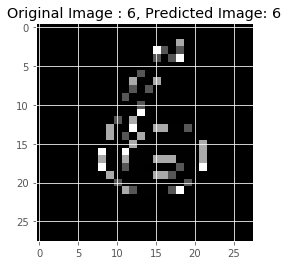

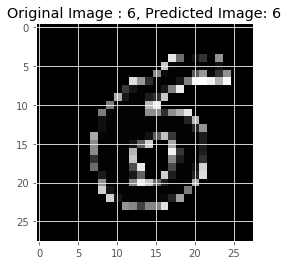

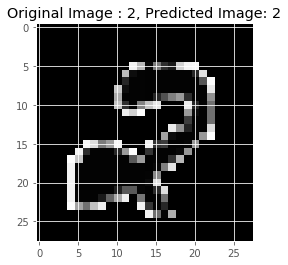

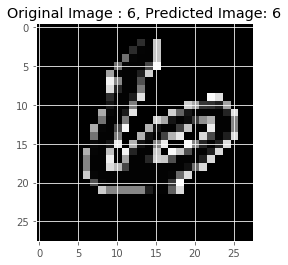

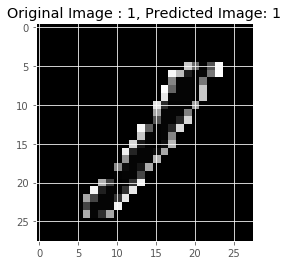

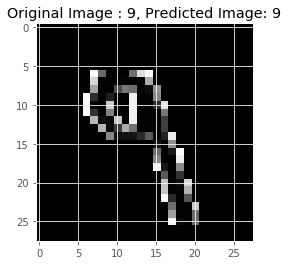

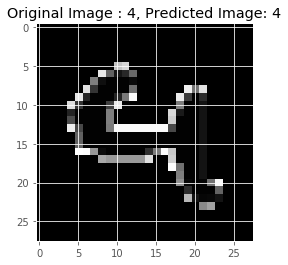

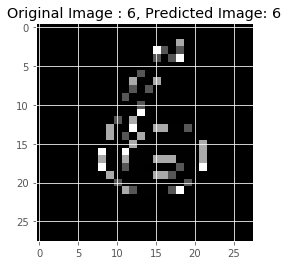

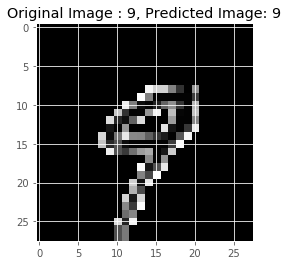

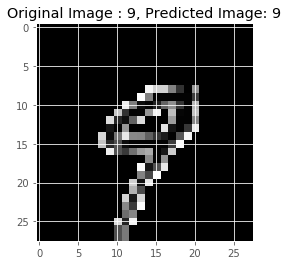

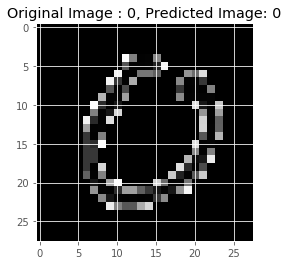

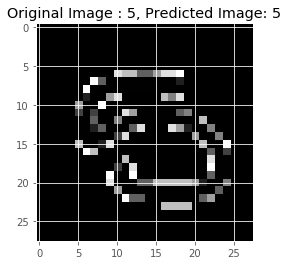

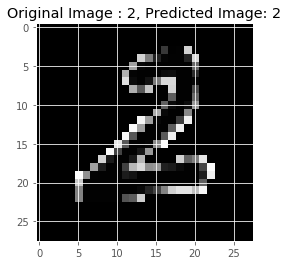

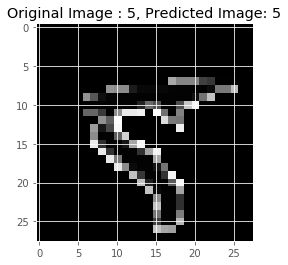

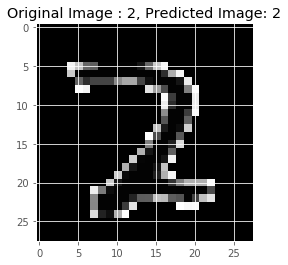

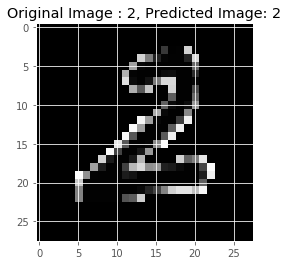

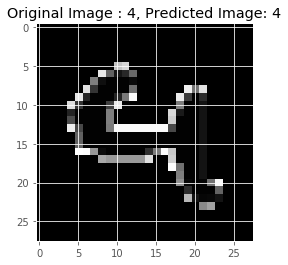

In [24]:
# Now we will show the the Test Images with Predicted Label and True Label
# np.random.randint(lowest_no, highest_no, size)
a = np.random.randint(1,50,size=20)
for i in a:
    Pred_image_label =((np.reshape(X_test[i],(28,28)))*255).astype(np.uint8)
    plt.title('Original Image : {0}, Predicted Image: {1}'.format(Y_test[i], Y_pred[i]))
    plt.imshow(Pred_image_label, interpolation='nearest',cmap='gray')
    plt.show()